In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


     XMEAS1       XMEAS2       XMEAS3    XMEAS4     XMEAS5     XMEAS6  \
0  0.271033  3649.739415  4451.320791  9.223142  32.392900  47.559754   
1  0.270826  3653.341885  4488.640140  9.211980  32.501953  47.374855   
2  0.270474  3688.113265  4432.832766  9.235690  32.402838  47.817088   
3  0.272127  3651.680041  4459.268940  9.192009  31.876790  47.869249   
4  0.270939  3636.329271  4460.409756  9.277992  32.424754  47.509322   

        XMEAS7     XMEAS8      XMEAS9   XMEAS10  ...    XMEAS22       XMV1  \
0  2798.975799  64.995825  122.898796  0.197826  ...  92.262531  62.806984   
1  2800.296214  65.091251  122.877519  0.196092  ...  92.492697  62.819324   
2  2802.647777  64.812363  122.916165  0.204023  ...  92.368550  62.836835   
3  2803.693084  64.205417  122.892493  0.220561  ...  92.310705  62.848190   
4  2804.787223  64.598623  122.890514  0.236146  ...  92.215839  62.848341   

        XMV2       XMV3       XMV4       XMV6       XMV7       XMV8  \
0  53.286709  26.6621

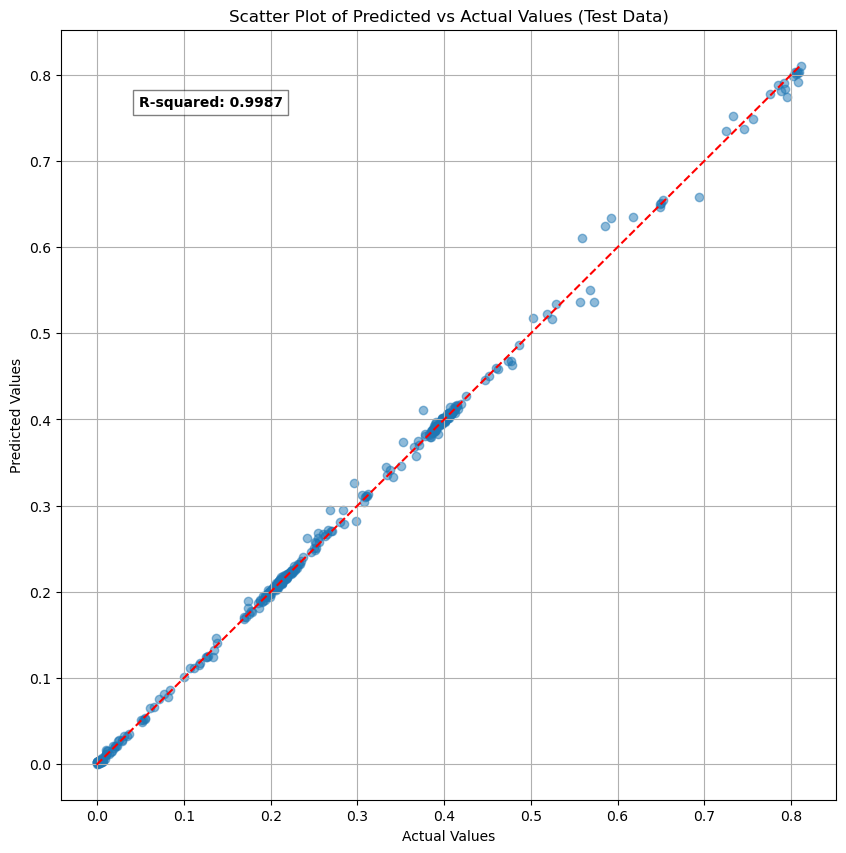

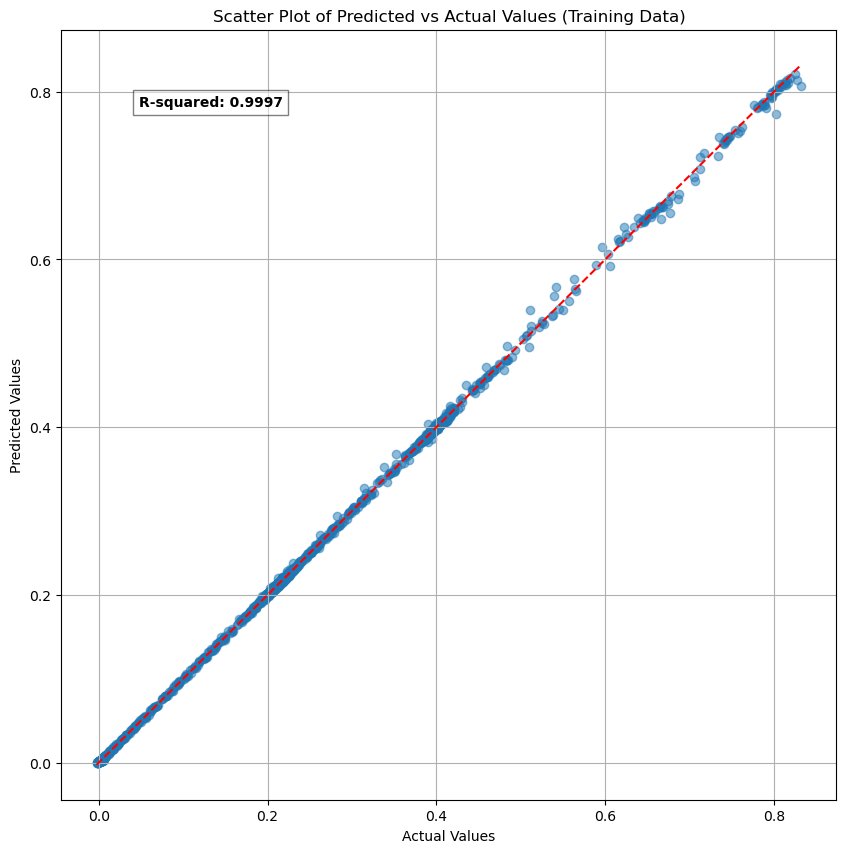

In [10]:
#Load/ preprocess

data = pd.read_csv('../data/clean_RawData.csv')
if 'INDEX' in data.columns:
    data = data.drop('INDEX', axis=1)
if 'Unnamed: 0' in data.columns:
    data = data.drop('Unnamed: 0', axis=1)
data.fillna(data.mean(), inplace=True)
print(data.head())

X = data.drop('XMEAS10', axis=1) 
y = data['XMEAS10']   

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Random Forest Model

rf = RandomForestRegressor(random_state=42)


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Calculate RMSE and R-squared
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training RMSE: {rmse_train}")
print(f"Testing RMSE: {rmse_test}")
print(f"Training R2: {r2_train}")
print(f"Testing R2: {r2_test}")

# Scatter plot for testing data
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Scatter Plot of Predicted vs Actual Values (Test Data)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.text(0.1, 0.9, f'R-squared: {r2_test:.4f}', transform=plt.gca().transAxes, 
         fontsize=10, fontweight='bold', bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.savefig('../Kyle/RF_test_scatter_plot.png', format='png')
plt.show()

# Scatter plot for training data
plt.figure(figsize=(10, 10))
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.title('Scatter Plot of Predicted vs Actual Values (Training Data)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.text(0.1, 0.9, f'R-squared: {r2_train:.4f}', transform=plt.gca().transAxes, 
         fontsize=10, fontweight='bold', bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.savefig('../Kyle/RF_training_scatter_plot.png', format='png')
plt.show()